In [3]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set(context='notebook', style='white', rc = {'figure.figsize':(14,10)})
digits = load_digits()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify = digits.target,random_state = 42)

In [6]:
svc = SVC().fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_train, y_train)

/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
svc.score(x_test, y_test), knn.score(x_test, y_test)

(0.62, 0.9844444444444445)

In [8]:
import umap

In [9]:
trans = umap.UMAP(n_neighbors = 5, n_components = 2, random_state = 42).fit(x_train)

/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


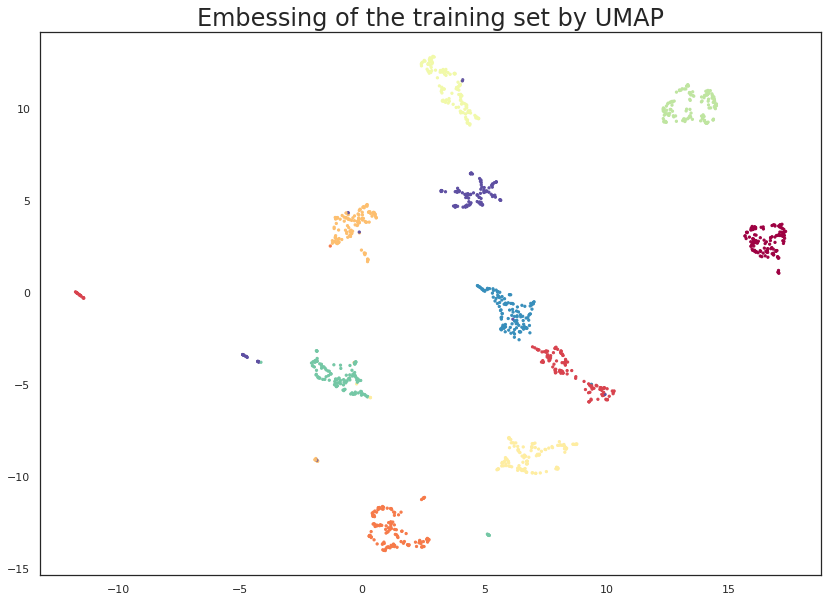

In [10]:
plt.scatter(trans.embedding_[:,0], trans.embedding_[:,1], s = 5, c =y_train, cmap = 'Spectral')
plt.title('Embessing of the training set by UMAP', fontsize = 24);

In [21]:
trans = umap.UMAP(n_neighbors = 5, n_components = 10, random_state = 42).fit(x_train)

/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


In [22]:
svc = SVC().fit(trans.embedding_,y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
svc.score(trans.transform(x_test), y_test), knn.score(trans.transform(x_test), y_test)

(0.9822222222222222, 0.9822222222222222)